In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
from numpy import linalg as LA
from pylab import *
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import csv
import cmath 


In [2]:
alpha=3
m = 1
pareto_mean = alpha * m / (alpha - 1)
pareto_var = ( m / (alpha - 1 )) * ( m / (alpha - 1 )) * alpha / (alpha - 2)
def generate_matrix(n, p):
    X1 = [[0]*p for i in range(n)]
    for i in range(n):
        for j in range(p):
            X1[i][j] = ((np.random.pareto(alpha)+1) * m - pareto_mean ) / math.sqrt(pareto_var)
    X = np.matrix(X1)
    A = X * X.getT() / p
    lam, vec = LA.eig(A)
    return lam.real

In [5]:
with open('heavy_tails_for_pic.csv') as file1:
    array = np.loadtxt(file1, delimiter=",")

In [7]:
len(array)

456000

In [8]:
len(generate_matrix(3000, 5000))

3000

In [3]:
A = generate_matrix(3000, 5000)
B = generate_matrix(3000, 5000)


In [13]:
eta = 0.05
E = np.linspace(-3 , 20, num = 5000)
ImGA = [0] * len(E)
for i in range (len(E)):
    ImGA[i] = np.sum(eta/((E[i] - A) ** 2 + eta ** 2) )
ImGB = [0] * len(E)
for i in range (len(E)):
    ImGB[i] = np.sum(eta/((E[i] - B) ** 2 + eta ** 2) )

In [14]:
outcome = [0] * len(E)
for i in range (len(E)):
    outcome[i] = (ImGA[i] - ImGB[i]) / (3000 ** (1 / 4))

In [26]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

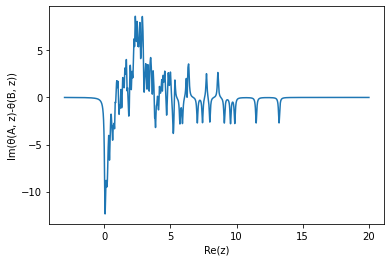

In [23]:
plt.plot(E, outcome)
plt.xlabel('Re(z)')
plt.ylabel('Im(θ(A, z)-θ(B, z))')
plt.savefig('lss.png', dpi = 300)

In [22]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [3]:
help(cmath)

Help on module cmath:

NAME
    cmath

MODULE REFERENCE
    https://docs.python.org/3.8/library/cmath
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to mathematical functions for complex
    numbers.

FUNCTIONS
    acos(z, /)
        Return the arc cosine of z.
    
    acosh(z, /)
        Return the inverse hyperbolic cosine of z.
    
    asin(z, /)
        Return the arc sine of z.
    
    asinh(z, /)
        Return the inverse hyperbolic sine of z.
    
    atan(z, /)
        Return the arc tangent of z.
    
    atanh(z, /)
        Return the inverse hyperbolic tangent of z.
    
    cos(z, /)
        Return the cosine of z.
    
    cosh(z, /)
        Return the

In [ ]:
def mp_law (y, eta, E) :
    z = E + i * eta
    